In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#try:
    # %tensorflow_version only exists in Colab.
#    %tensorflow_version 2.x
#except Exception:
#    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common or useful imports
import numpy as np
import os
from scipy.io import arff
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
mnistdata='../Datasets/ARFFdata/fashionMNIST.arff'
data = arff.loadarff( mnistdata )
df = pd.DataFrame(data[0])

df.columns
XX=df.to_numpy()
print(np.shape(XX))
G=np.shape(XX)




(70000, 785)


In [3]:
X=XX[:,0: G[1]-1 ]
y=XX[:, G[1]-1 ]
print( np.sqrt( G[1]-1 ))
idim=np.sqrt( G[1]-1 ).astype(int)
print(idim)

28.0
28


In [4]:
X = np.reshape( X , ( G[0], idim, idim) ).astype(float)
y = y.astype(int)
print(np.shape(X))
print(np.shape(y))
print(y[0])


(70000, 28, 28)
(70000,)
9


In [5]:
X_train = X[0:60_000,:,:]
y_train = y[0:60_000]
X_test = X[60_000:,:,:]
y_test = y[60_000:]

In [6]:
print(np.shape(X_train))
print(np.shape(X_test))


(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_valid, X_train1 = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train1 = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#X_train1


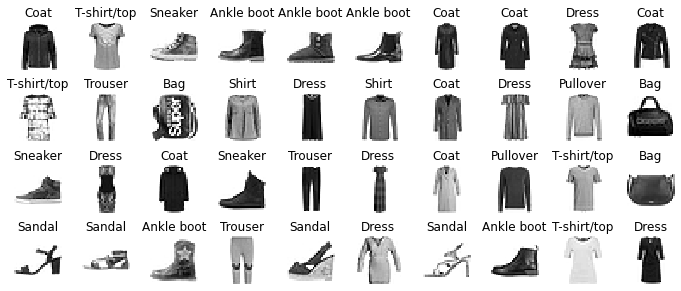

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train1[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train1[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)

In [10]:
np.random.seed(41)
tf.random.set_seed(41)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

2023-02-28 15:08:18.242881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

Equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer= ??? ,
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [14]:
history = model.fit(X_train1, y_train1, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 312s 181ms/step - loss: 0.6957 - accuracy: 0.7519 - val_loss: 0.3464 - val_accuracy: 0.8742
Epoch 2/10
1719/1719 [==============================] - 297s 173ms/step - loss: 0.3964 - accuracy: 0.8636 - val_loss: 0.2984 - val_accuracy: 0.8958
Epoch 3/10
1719/1719 [==============================] - 316s 184ms/step - loss: 0.3395 - accuracy: 0.8859 - val_loss: 0.2580 - val_accuracy: 0.9020
Epoch 4/10
1719/1719 [==============================] - 249s 145ms/step - loss: 0.3053 - accuracy: 0.8953 - val_loss: 0.2598 - val_accuracy: 0.9086
Epoch 5/10
1719/1719 [==============================] - 279s 162ms/step - loss: 0.2793 - accuracy: 0.9048 - val_loss: 0.2557 - val_accuracy: 0.9102
Epoch 6/10
1719/1719 [==============================] - 349s 203ms/step - loss: 0.2667 - accuracy: 0.9092 - val_loss: 0.2478 - val_accuracy: 0.9130
Epoch 7/10
1719/1719 [==============================] - 326s 190ms/step - loss: 0.2448 - accuracy: 0.9163 - val_

In [15]:
yprob=model.predict(X_test)
print(yprob.round(2))
yclass = np.argmax(yprob,axis=1)


313/313 [==============================] - 15s 46ms/step
[[0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.38 0.   0.01]]


951 10000


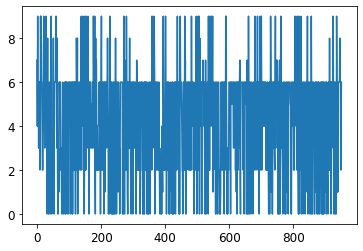

In [16]:
#ypred=model.predict_classes(X_test[0:2])
#print(ypred)
#plt.scatter( y_test, yclass )
poo=np.where( y_test != yclass )
print(len(poo[0]),len(y_test) )

plt.plot( y_test[poo[0]] )

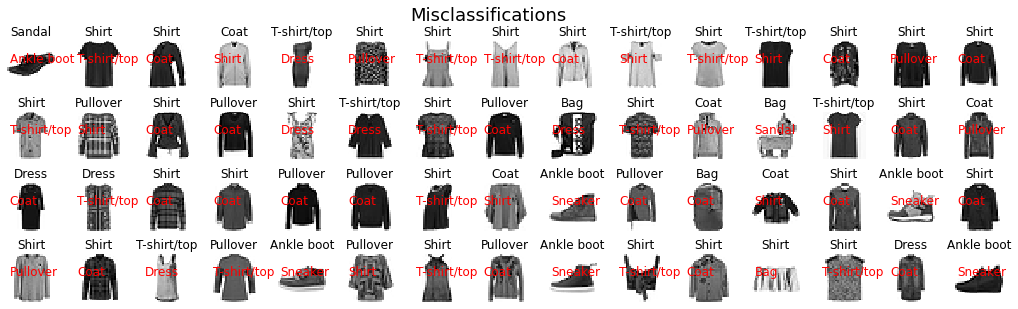

In [17]:
n_rows = 4
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
plt.suptitle( "Misclassifications",fontsize=18 )
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        index1=poo[0][index + 100]
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index1], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index1]], fontsize=12)
        plt.annotate(class_names[yclass[index1]],fontsize=12,color='red',xy= (1,12) )
plt.subplots_adjust(wspace=0.2, hspace=0.5)


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.xlim(-.5,30)

In [ ]:
print(np.shape(X_valid))


In [ ]:
soo=X_valid[0,:,:]
print(np.shape(soo))